In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/polls_usercandidate.parquet'

# 데이터 불러오기
usercandidate_df = pd.read_parquet(gcs_path, engine='pyarrow')
usercandidate_df

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
...,...,...,...,...
4769604,646672580,2024-05-08 01:36:00,200139933,857296
4769605,646672581,2024-05-08 01:36:18,200139934,850774
4769606,646672582,2024-05-08 01:36:18,200139934,856446
4769607,646672583,2024-05-08 01:36:18,200139934,857101


In [3]:
usercandidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB


In [4]:
usercandidate_df.isnull().sum()

id                   0
created_at           0
question_piece_id    0
user_id              0
dtype: int64

In [5]:
usercandidate_df.describe(include='all')

,id,created_at,question_piece_id,user_id
count,4.769609e+06,4769609,4.769609e+06,4.769609e+06
mean,2.388684e+08,2023-05-17 13:57:52.437731072,7.430248e+07,1.090241e+06
min,3.088872e+06,2023-04-28 12:27:49,9.984580e+05,8.331120e+05
25%,6.270339e+07,2023-05-10 02:49:19,1.891695e+07,8.835900e+05
50%,2.126700e+08,2023-05-15 16:15:12,6.639655e+07,1.087460e+06
75%,3.800215e+08,2023-05-22 11:33:33,1.178876e+08,1.233969e+06
max,6.466726e+08,2024-05-08 01:36:18,2.083515e+08,1.580629e+06
std,1.844893e+08,NaN,5.761959e+07,2.018190e+05


#### 일별 생성 수

<Axes: title={'center': '일별 후보 생성 수'}, xlabel='date'>

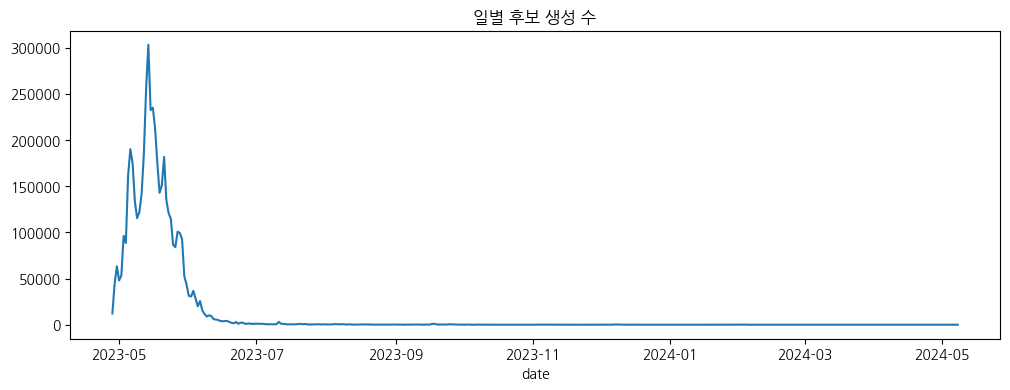

In [6]:
usercandidate_df['date'] = usercandidate_df['created_at'].dt.date
usercandidate_df['date'].value_counts().sort_index().plot(kind='line', figsize=(12, 4), title='일별 후보 생성 수')

 1. 2023년 5월 전후에 폭발적인 생성
- 일별 30만 건 이상 생성된 시점도 있음
- 이후 급격한 하락, 약 한 달 내에 거의 0 근처로 수렴
              
2. 2023년 7월 이후로는 미미한 활동
- 이후 수개월간 거의 활동이 없음
- 소수의 유저 또는 테스트성 활동만 지속된 것으로 보임



In [15]:
# 상위 활동 유저
top_users = usercandidate_df['user_id'].value_counts().head(10)
top_users

user_id
860304     4226
940572     4070
1137034    3948
1207066    3920
994573     3674
1019558    3664
1206668    3648
1017272    3584
1085141    3562
915833     3544
Name: count, dtype: int64

In [19]:
# 특정 날짜에 누가 활동 했는지
peak_day = usercandidate_df['date'].value_counts().idxmax()
peak_day_users = usercandidate_df[usercandidate_df['date'] == peak_day]['user_id'].value_counts()
peak_day_users.head(10)

user_id
1207784    927
1235019    917
1207066    915
1207079    903
1185764    855
1206668    784
1207076    765
1165022    667
1207183    633
1207022    600
Name: count, dtype: int64

In [20]:
usercandidate_df['weekday'] = usercandidate_df['created_at'].dt.day_name()
usercandidate_df['hour'] = usercandidate_df['created_at'].dt.hour

# 요일/시간대별 활동량
usercandidate_df['weekday'].value_counts()

weekday
Sunday       873202
Saturday     800332
Monday       677272
Friday       635749
Tuesday      618986
Wednesday    616945
Thursday     547123
Name: count, dtype: int64

In [21]:
usercandidate_df['hour'].value_counts()

hour
13    388599
14    380334
12    342797
15    311914
11    311307
9     282286
10    281208
8     279848
7     247207
6     218564
5     197787
23    196781
4     187800
16    185900
3     183052
2     166842
22    151646
1     150168
0     125684
17     79839
21     40085
18     33175
19     14276
20     12510
Name: count, dtype: int64

#### 유저별 후보 생성 수 분포

Text(0, 0.5, '유저 수')

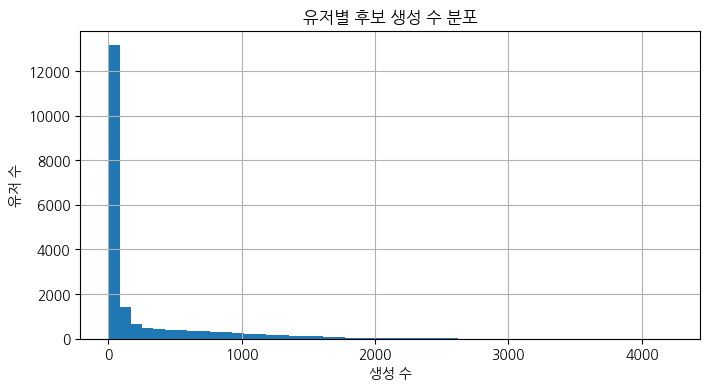

In [7]:
user_counts = usercandidate_df['user_id'].value_counts()
user_counts.hist(bins=50, figsize=(8, 4))
plt.title('유저별 후보 생성 수 분포')
plt.xlabel('생성 수')
plt.ylabel('유저 수')

In [22]:
cumulative = user_counts.sort_values(ascending=False).cumsum()
total = cumulative.max()
pareto_cutoff = cumulative[cumulative <= total * 0.8].shape[0]
print(f"상위 {pareto_cutoff}명의 유저가 전체 후보 생성의 80%를 담당")

상위 3641명의 유저가 전체 후보 생성의 80%를 담당


In [23]:
top_user_id = user_counts.idxmax()
usercandidate_df[usercandidate_df['user_id'] == top_user_id]['question_piece_id'].nunique()


4226

#### 질문 조각별 후보 수 분포

In [8]:
question_piece_counts = usercandidate_df['question_piece_id'].value_counts()
question_piece_counts.head(10)  # 가장 많이 후보가 달린 question_piece_id 10개

question_piece_id
9494270      16
14806469     16
28856618     16
124552858    12
80794775     12
73631610     12
14559335     12
70947287     12
73172618     12
119363599    12
Name: count, dtype: int64

#### 시간대별 후보 생성 패턴

<Axes: title={'center': '시간대별 후보 생성 수'}, xlabel='hour'>

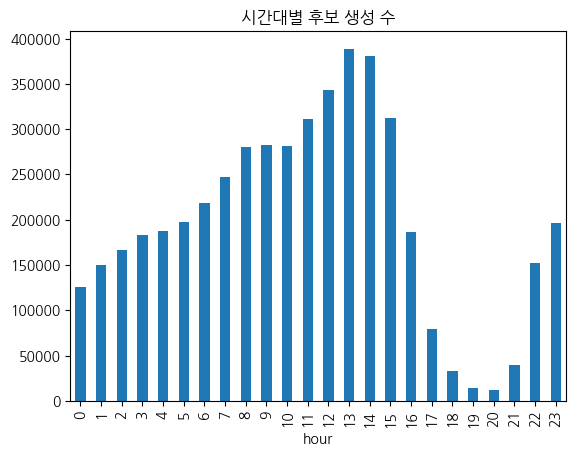

In [9]:
usercandidate_df['hour'] = usercandidate_df['created_at'].dt.hour
usercandidate_df['hour'].value_counts().sort_index().plot(kind='bar', title='시간대별 후보 생성 수')

#### 유저-질문 조각 매핑 다양성

In [10]:
# 유저가 몇 개의 question_piece_id에 참여했는지
diversity = usercandidate_df.groupby('user_id')['question_piece_id'].nunique()
diversity.describe()

count    19994.000000
mean       238.523257
std        447.276428
min          1.000000
25%          7.000000
50%         29.000000
75%        220.000000
max       4226.000000
Name: question_piece_id, dtype: float64

In [11]:
user_counts[user_counts > 1000]  # 예: 1000건 초과

user_id
860304     4226
940572     4070
1137034    3948
1207066    3920
994573     3674
           ... 
883576     1002
854168     1002
1157397    1001
1406155    1001
867992     1001
Name: count, Length: 1575, dtype: int64